# Classifiction using Decision Trees

## Predicting Heart Disease
- Using Data from UCI Machine Learning Repository
- Using Classification Trees

---

## Load Packages

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline

In [62]:
# Print Version
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")

pandas version: 1.0.3
numpy version: 1.17.5


---

## Import Data
- [Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
- Using locally saved dataset

In [63]:
# Read in Data
df = pd.read_csv("./Data/heart-disease.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


#### Add column names based on info provided in [UCI Machine Learning Repository for Heart Disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)
- **age**: 
- **sex**:
- **cp**: Chest Pain
- **restbp**: Resting Blood Pressure
- **chol**: serum cholesterol
- **fbs**: Fasting Blood Sugar
- **restecg**: Resting Electrocardiographic resuls
- **thalach**: Maximum Heart Rate Achieved
- **exang**: Exercise induced angina
- **oldpeak**: St depression induced by exercise relative to rest
- **slope**: The Slope of the Peak Exercise ST segment
- **ca**: Number of major vessels(0-3) colored by fluoroscopy
- **thal**: Thalium Heart Scan
- **hd**: Heart Disease

In [64]:
# Change column names
col_names = ['age', 'sex', 'cp', 'restbp', 'chol', 
             'fbs', 'restecg', 'thalach', 'exang', 
             'oldpeak', 'slope', 'ca', 'thal', 'hd']

# Use dictionary with df.rename(columns=col_names, inplace=True) to rename and replace columns
df.columns = col_names
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


---

## Pre-process: Missing Data
- Look at features data types and find any missign data
- All columns should be numeric and *object* data type implies non-numeric data

In [65]:
# Look at column data types
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [66]:
# Look for Missing data.  No missing data
df.isna().any()

age        False
sex        False
cp         False
restbp     False
chol       False
fbs        False
restecg    False
thalach    False
exang      False
oldpeak    False
slope      False
ca         False
thal       False
hd         False
dtype: bool

In [67]:
# Look at unique values in 'ca' column.  ? represents missing data
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [68]:
# Look at unique values in 'thal' column.  ? represents missing data
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

#### Print all rows with missing data (?) in either 'ca' or 'thal' columns

In [69]:
df.loc[(df['ca'] == '?') | (df['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


#### Determine percentage of missing data to the whole dataset

In [70]:
# Round to the second decimal
round((len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')]) / len(df) * 100), 2)

1.98

#### Since only 2% of data has missing information, remove rows with missing data

In [71]:
# Remove rows with missing data by assigning back to 'df'
df = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]
len(df)

297

---

## Pre-process: Split Data into Features and Target
- Use `copy()` to not modify the original dataset

In [72]:
# Make a copy of Feature Columns
X = df.drop(labels='hd', axis='columns').copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [73]:
# Make a copy of Target Columns
y = df['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

---

## Pre-process: One-Hot Encoding
Use **pandas** `get_dummies()` function.  Other option is to use **sk-learn** `ColumnTransformer()` function
- **age**: Float
- **sex**: Categorical
    - 0: Female
    - 1: Male
- **cp**: Chest Pain, Categorical
    - 1: typical angina
    - 2: atypical angina
    - 3: non-anginal pain
    - 4: asymptomatic
- **restbp**: Resting Blood Pressure, Float
- **chol**: serum cholesterol, Float
- **fbs**: Fasting Blood Sugar, Categorical
    - 0: >= 120mg/dl
    - 1: <= 120mg/dl
- **restecg**: Resting Electrocardiographic resuls, Categorical
    - 1: normal
    - 2: having ST-T wave abnormality
    - 3: showing probable or definite left venticular hypertrophy
- **thalach**: Maximum Heart Rate Achieved, Float
- **exang**: Exercise induced angina, Categorical
    - 0: no
    - 1: yes
- **oldpeak**: St depression induced by exercise relative to rest, Float
- **slope**: The Slope of the Peak Exercise ST segment, Categorical
    - 1: unsloping
    - 2: flat
    - 3: downsloping
- **ca**: Number of major vessels(0-3) colored by fluoroscopy, Float
- **thal**: Thalium Heart Scan, Categorical
    - 3: normal
    - 6: fixed efect
    - 7: reversible defect

#### To use categorical Data with *sk-learn Decision Trees*, convert a column of categorical data into multiple columns of binary values
- Don't need to convert Categorical Data with only 2 categories

In [74]:
# One-Hot encode Categorical Columns: cp, restecg, slope, thal
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


### Convert Target to only contain 0 and 1 for Heart Disease indication
- Target label contains 5 different levels with 0 indicating no heart disease and 1-4 indicatinf various levels of heart disease
- Convert all numbers above 0 to 1 to indicate heart disease

In [75]:
y.unique()

array([0, 2, 1, 3, 4])

In [76]:
# Convert numbers > 0 to 1
y[y > 0] = 1
y.unique()

array([0, 1])

---

## Benchmark Preliminary Classification Tree
- First pass with no parameter tuning and tree pruning
- Could also specify to `stratify=y` to stratify by target labels

In [77]:
# Split the Data into Training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

# Fit the Training Data to Dicision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt = model_dt.fit(X_train, y_train)
model_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

#### Plot the Decision tree

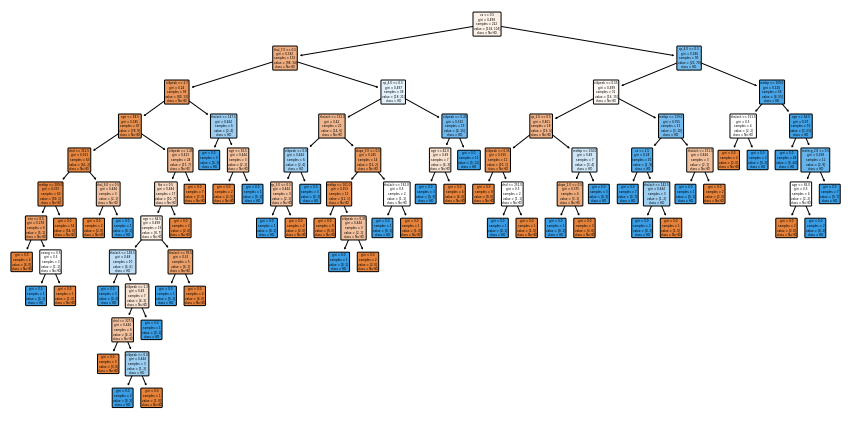

In [78]:
plt.figure(figsize=(15, 7.5))
plot_tree(model_dt, filled=True, rounded=True, class_names=["No HD", "HD"], feature_names=X_encoded.columns)
plt.show()

#### Test on Test Data and plot Confusion Matrix

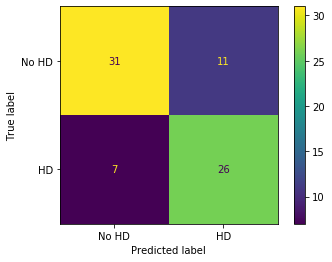

In [79]:
# Confusion Matrix
plot_confusion_matrix(model_dt, X_test, y_test, display_labels=["No HD", "HD"])

Out of 42 people *without* heart disease, **31 (74%)** are correctly classified.  Out of 33 people *with* heart disease, **26 (79%)** are correctly classified.  Might be a sign of overfitting.

---

## Cost Complexity Pruning: 
- Simplifies pruning to find a smaller tree that is not overfitted
- Find the right value of pruning parameter `alpha`, which controls how much to prune
- Plot the accuracy of the tree as a function of different values for both Training and Testing Datasets
- Extract different values for `alpha` that are available, omitting the maximum value whcihc would prune all the way to the root node

In [80]:
# Determine and extract values for aplha, omitting the maximum value
path = model_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]
ccp_alphas

array([0.        , 0.00295295, 0.003861  , 0.00405405, 0.004095  ,
       0.00429358, 0.00514801, 0.00541298, 0.00578761, 0.00600601,
       0.00600601, 0.00600601, 0.00667591, 0.00675676, 0.00757375,
       0.00811505, 0.00868726, 0.00889851, 0.01038181, 0.0105777 ,
       0.01422475, 0.01604051, 0.01642461, 0.02103075, 0.03680006,
       0.03934523])

#### Create one Decision Tree per `alpha` value

In [88]:
# Create array of Decision Tree for each avlue of alpha
model_dts = []

for ccp_alpha in ccp_alphas:
    model_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    model_dt.fit(X_train, y_train)
    model_dts.append(model_dt)

#### Graph the Accuracy of the trees using Training Dataset and Testing Dataset as function of alpha

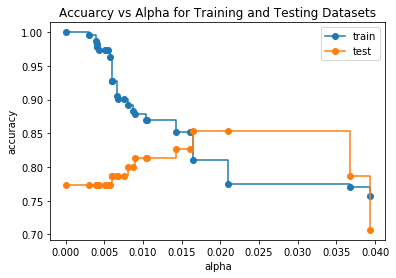

In [90]:
train_scores = [model_dt.score(X_train, y_train) for model_dt in model_dts]
test_scores = [model_dt.score(X_test, y_test) for model_dt in model_dts]

fig, ax, = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuarcy vs Alpha for Training and Testing Datasets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle='steps-post')
ax.legend()
plt.show()

The Accuracy of the Testing Dataset is highest when `alpha` is about 0.016.  For **Classification Tree**, the values for `alpha` range from 0 to 1, because *GINI* scores range from 0 to 1.  For **Regression Tree**, `alpha` values can range from 0 to infinity because sum of squared residuals can go from 0 to positive infinity.

---

## Cost Complexity Pruning with Cross Validation
- Use Cross Validation to find the optimal value for `alpha`

In [92]:
# Create array to store results of each fold during CV
alpha_loop_values = []

# 5-Fold CV for each value of alpha.  Store mean and SD
for ccp_alpha in ccp_alphas:
    model_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(model_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
alpha_loop_values[0:5]

[[0.0, 0.6755555555555556, 0.09932976083537857],
 [0.0029529529529529544, 0.6755555555555556, 0.09932976083537857],
 [0.003861003861003862, 0.6799999999999999, 0.09317304439819664],
 [0.004054054054054055, 0.6799999999999999, 0.09317304439819664],
 [0.004095004095004095, 0.6799999999999999, 0.09317304439819664]]

#### Graph Mean and Standard Deviation of the Scores

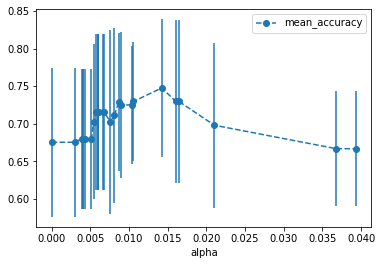

In [95]:
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])
alpha_results.plot(x="alpha", y="mean_accuracy", yerr="std", marker="o", linestyle="--")

Best `alpha` value seems to be somewhere between **0.014** and **0.015**

In [101]:
# Find exact value for alpha
optimal_alpha = alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]
optimal_alpha = optimal_alpha['alpha'] # pandas Series
optimal_alpha = float(optimal_alpha) # Convert to float
optimal_alpha 

0.014224751066856332

---

## Final Classificatio Tree
- Using optimal `alpha` parameter

In [102]:
model_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
model_dt_pruned = model_dt_pruned.fit(X_train, y_train)
model_dt_pruned

DecisionTreeClassifier(ccp_alpha=0.014224751066856332, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=42, splitter='best')

#### Look at Confusion Matrix

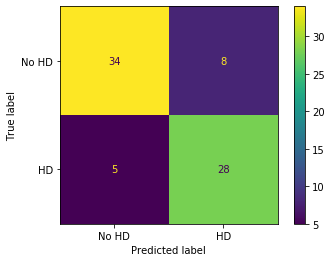

In [103]:
plot_confusion_matrix(model_dt_pruned, X_test, y_test, display_labels=["No HD", "HD"])

Out of 42 people *without* heart disease, **34 (81%)** are correctly classified.  Out of 33 people *with* heart disease, **28 (85%)** are correctly classified.  Might be a sign of overfitting.

#### Plot the Tree

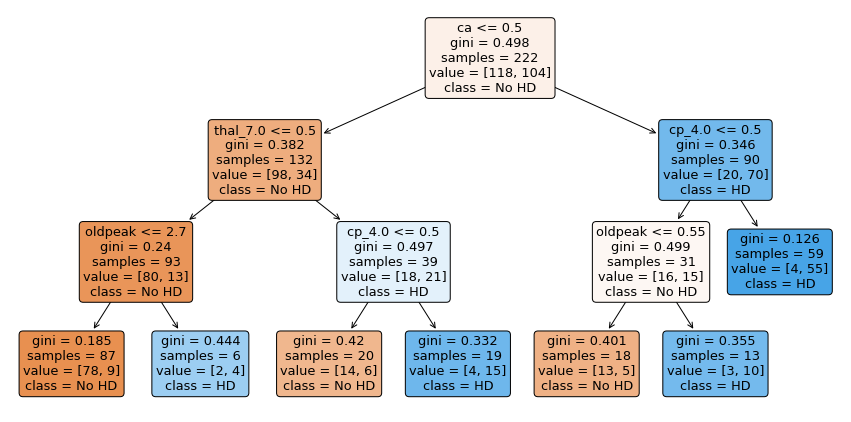

In [104]:
plt.figure(figsize=(15, 7.5))
plot_tree(model_dt_pruned, filled=True, rounded=True, class_names=["No HD", "HD"], feature_names=X_encoded.columns)
plt.show()

## Results:
- Lower **gini** inpurity index results in better split.  Darker colored nodes indicate lower **gini** index.
- **samples** indicate how many samples are in the node
- **value** indicates the number of samples in each category (in alphabetical order).  In root node, there are 118 *No HD* samples, and 104 *HD* samples.  
- **class** indicates which category is represented the most in the node.

---